In [1]:
import keras
import numpy as np
import pandas as pd
import plotly.express as px 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier



### Display basic information about the dataset

In [ ]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = "{:.1f}".format
training_data = pd.read_csv("Phishing_Legitimate_full.csv")

## Display basic information about the dataset


In [ ]:
print(training_data.info())
print(training_data.describe())
print("The columns are: ", training_data.columns)
print("The null values are: ", training_data.isnull().sum())
columns = [training_data.columns]
print("The class label counts are: ", training_data['CLASS_LABEL'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

## Calculate correlation matrix


CLASS_LABEL                           1.0
FrequentDomainNameMismatch            0.5
PctNullSelfRedirectHyperlinks         0.3
InsecureForms                         0.3
NumDots                               0.3
PctExtHyperlinks                      0.3
NumSensitiveWords                     0.3
PathLevel                             0.2
AbnormalExtFormActionR                0.2
UrlLengthRT                           0.2
HostnameLength                        0.2
NumDashInHostname                     0.2
EmbeddedBrandName                     0.1
IpAddress                             0.1
MissingTitle                          0.1
ExtMetaScriptLinkRT                   0.1
DomainInSubdomains                    0.1
TildeSymbol                           0.1
RightClickDisabled                    0.1
ExtFavicon                            0.1
PctExtResourceUrlsRT                  0.1
NumHash                               0.0
SubdomainLevel                        0.0
DoubleSlashInPath                 

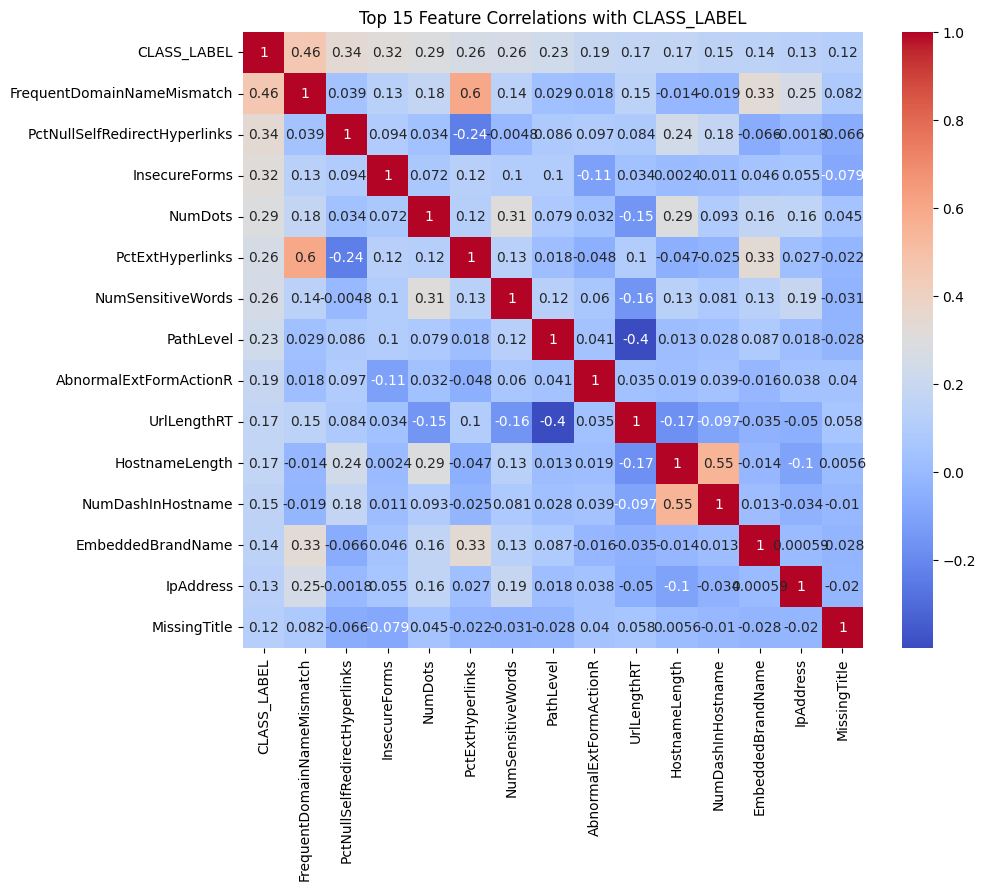

In [ ]:
corr_matrix = training_data.corr()
target_corr = corr_matrix['CLASS_LABEL'].sort_values(ascending=False)# calculate correlation with target variable and sort them
# Show top 15 correlated features
print(target_corr)
# Plot heatmap for the top correlated features
top_features = target_corr.head(15).index
plt.figure(figsize=(10, 8))
sns.heatmap(training_data[top_features].corr(), annot=True, cmap="coolwarm")
plt.title("Top 15 Feature Correlations with CLASS_LABEL")
plt.show()

## Select the features 

In [ ]:
selected_features = [
    'FrequentDomainNameMismatch', #0.46
    'PctNullSelfRedirectHyperlinks', #0.34
    'InsecureForms', #0.32
    'NumDots',#0.29
    'PctExtHyperlinks'#0.26
]

## Remove these from feature set

In [ ]:
X_selected = training_data[selected_features]
y = training_data['CLASS_LABEL']


## split data into train/test sets (80% train, 20% test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)
keras.utils.set_random_seed(42)


## Normalize Linear scaling (important for Logistic Regression)


In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Train model

In [ ]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


## Evaluate


In [ ]:
y_pred = model.predict(X_test_scaled)

## Compare the predictions with the true labels

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.806
              precision    recall  f1-score   support

           0       0.74      0.93      0.83      1000
           1       0.91      0.68      0.78      1000

    accuracy                           0.81      2000
   macro avg       0.83      0.81      0.80      2000
weighted avg       0.83      0.81      0.80      2000

[[933  67]
 [321 679]]


## Create the confusion matrix

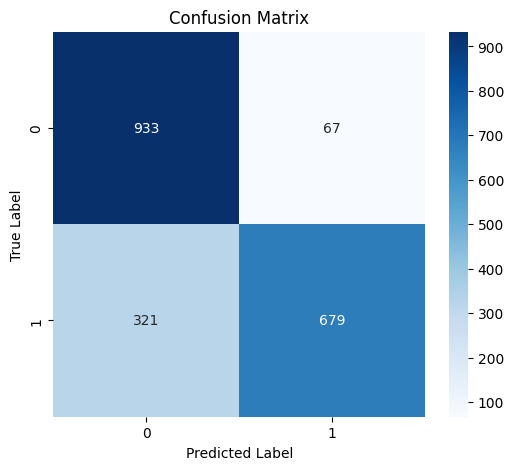

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Plot the ROC Curve for the test set for trraining set

In [ ]:
y_train_prob = model.predict_proba(X_train_scaled)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
roc_auc_train = auc(fpr_train, tpr_train)

## Plot the ROC Curve for the test set 

In [ ]:
y_test_prob = model.predict_proba(X_test_scaled)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

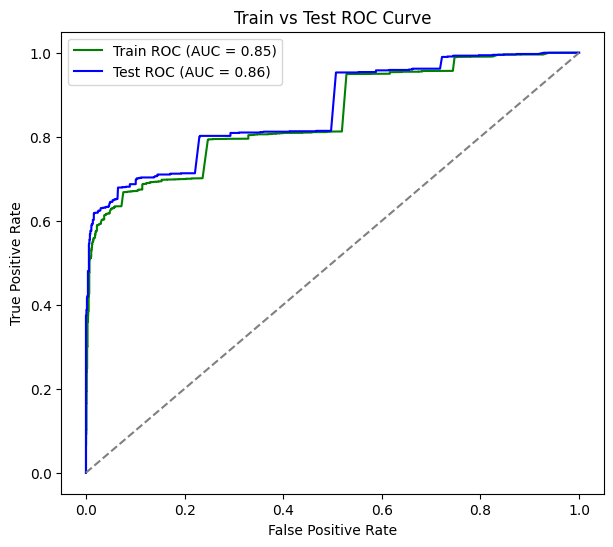

In [ ]:
plt.figure(figsize=(7, 6))
plt.plot(fpr_train, tpr_train, label=f"Train ROC (AUC = {roc_auc_train:.2f})", color='green')
plt.plot(fpr_test, tpr_test, label=f"Test ROC (AUC = {roc_auc_test:.2f})", color='blue')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title("Train vs Test ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

## Compare the precisions, recalls, thresholds 

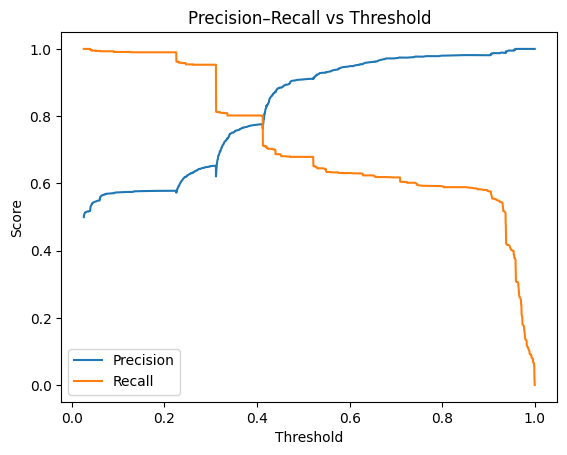

In [ ]:
y_proba = model.predict_proba(X_test_scaled)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.title('Precision–Recall vs Threshold')
plt.show()

## Test custom threshold for comparison

In [ ]:
y_train_prob = model.predict_proba(X_train_scaled)[:, 1]
y_test_prob = model.predict_proba(X_test_scaled)[:, 1]
threshold = 0.4
y_pred_custom = (y_test_prob >= threshold).astype(int)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred_custom))
print("Precision:", precision_score(y_test, y_pred_custom))
print("Recall:", recall_score(y_test, y_pred_custom))
print("F1 Score:", f1_score(y_test, y_pred_custom))
print(confusion_matrix(y_test, y_pred_custom))

Accuracy: 0.7845
Precision: 0.77487922705314
Recall: 0.802
F1 Score: 0.7882063882063882
[[767 233]
 [198 802]]


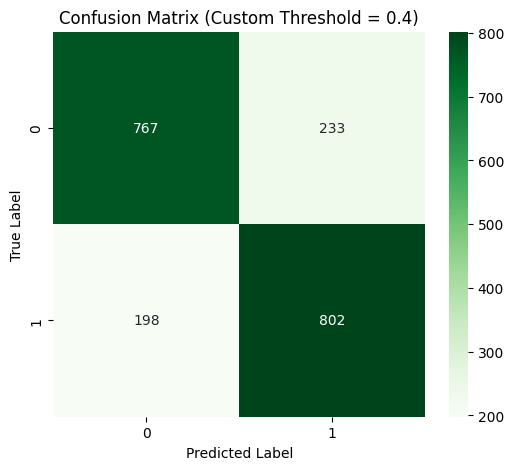

In [ ]:
cm_custom = confusion_matrix(y_test, y_pred_custom)
plt.figure(figsize=(6,5))
sns.heatmap(cm_custom, annot=True, fmt='d', cmap='Greens')
plt.title(f"Confusion Matrix (Custom Threshold = {threshold})")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
##  ROC & AUC for training and test

In [ ]:
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

## Plot ROC curves (same style as your original graph)

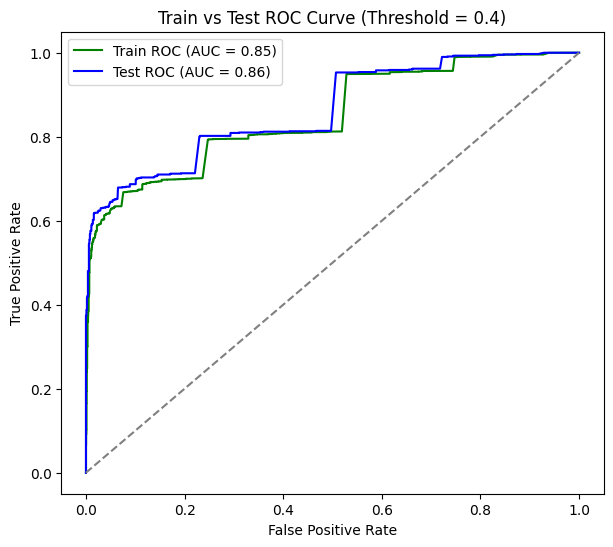

In [ ]:
plt.figure(figsize=(7, 6))
plt.plot(fpr_train, tpr_train, label=f"Train ROC (AUC = {roc_auc_train:.2f})", color='green')
plt.plot(fpr_test, tpr_test, label=f"Test ROC (AUC = {roc_auc_test:.2f})", color='blue')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title(f"Train vs Test ROC Curve (Threshold = {threshold})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()



## Try Random Forest

In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

## Performance Metrics 

In [ ]:
print("\n=== Random Forest Performance ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))



=== Random Forest Performance ===
Accuracy: 0.9615
Precision: 0.9493670886075949
Recall: 0.975
F1 Score: 0.9620128268376912
[[948  52]
 [ 25 975]]


## Confusion Matrix

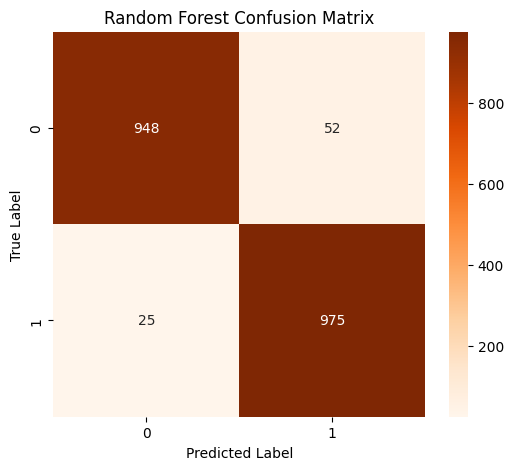

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## ROC Curve for Training Data

In [ ]:
y_proba_train_rf = rf_model.predict_proba(X_train)[:, 1]
fpr_train_rf, tpr_train_rf, _ = roc_curve(y_train, y_proba_train_rf)
roc_auc_train_rf = auc(fpr_train_rf, tpr_train_rf)


## ROC Curve for Test Data

In [ ]:
fpr_test_rf, tpr_test_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_test_rf = auc(fpr_test_rf, tpr_test_rf)


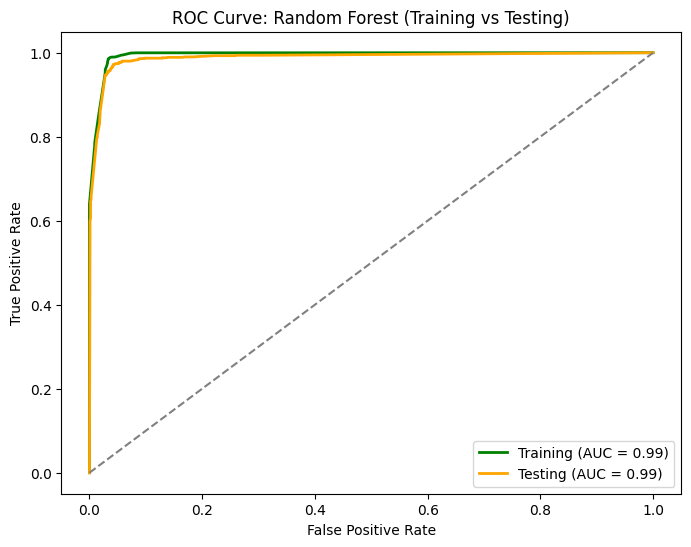

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_train_rf, tpr_train_rf, label=f"Training (AUC = {roc_auc_train_rf:.2f})", color='green', linewidth=2)
plt.plot(fpr_test_rf, tpr_test_rf, label=f"Testing (AUC = {roc_auc_test_rf:.2f})", color='orange', linewidth=2)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title("ROC Curve: Random Forest (Training vs Testing)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()